# Prediction Loan Default Project
This project aim to learn ML on IBM watson could platform use Apache spark with python tecnology. It use data from Analytic Viyhda project LTFS Data Science FinHack (ML Hackathon).
## 1. Import data
After import file to storage, call data by use credentials
### 1.1 Load Train Data Set

In [83]:
# The code was removed by Watson Studio for sharing.

configuration_name = 'os_c41ecf00d0b340ca9343fd9e9685bd2a_configs'

In [84]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_train = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('train.csv', 'analyticvidhya-donotdelete-pr-aln81syrlo2u0v'))

df_train.createOrReplaceTempView('df_train')
df_train

DataFrame[UniqueID: string, disbursed_amount: string, asset_cost: string, ltv: string, branch_id: string, supplier_id: string, manufacturer_id: string, Current_pincode_ID: string, Date.of.Birth: string, Employment.Type: string, DisbursalDate: string, State_ID: string, Employee_code_ID: string, MobileNo_Avl_Flag: string, Aadhar_flag: string, PAN_flag: string, VoterID_flag: string, Driving_flag: string, Passport_flag: string, PERFORM_CNS.SCORE: string, PERFORM_CNS.SCORE.DESCRIPTION: string, PRI.NO.OF.ACCTS: string, PRI.ACTIVE.ACCTS: string, PRI.OVERDUE.ACCTS: string, PRI.CURRENT.BALANCE: string, PRI.SANCTIONED.AMOUNT: string, PRI.DISBURSED.AMOUNT: string, SEC.NO.OF.ACCTS: string, SEC.ACTIVE.ACCTS: string, SEC.OVERDUE.ACCTS: string, SEC.CURRENT.BALANCE: string, SEC.SANCTIONED.AMOUNT: string, SEC.DISBURSED.AMOUNT: string, PRIMARY.INSTAL.AMT: string, SEC.INSTAL.AMT: string, NEW.ACCTS.IN.LAST.SIX.MONTHS: string, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS: string, AVERAGE.ACCT.AGE: string, CREDIT.HI

### Number of record in train data set  

In [85]:
total = spark.sql('SELECT COUNT(CAST(loan_default AS INT)) FROM df_train')
not_default = spark.sql('SELECT COUNT(CAST(loan_default AS INT)) FROM df_train WHERE loan_default = 0')
default = spark.sql('SELECT COUNT(CAST(loan_default AS INT)) FROM df_train WHERE loan_default = 1')
print ('Total')
total.show() 
print ('Not default')
not_default.show()
print ('Default')
default.show()

Total
+--------------------------------+
|count(CAST(loan_default AS INT))|
+--------------------------------+
|                          233154|
+--------------------------------+

Not default
+--------------------------------+
|count(CAST(loan_default AS INT))|
+--------------------------------+
|                          182543|
+--------------------------------+

Default
+--------------------------------+
|count(CAST(loan_default AS INT))|
+--------------------------------+
|                           50611|
+--------------------------------+



### 1.2 Load Test Data Set

In [86]:
df_test = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('test.csv', 'analyticvidhya-donotdelete-pr-aln81syrlo2u0v'))

df_test.createOrReplaceTempView('df_test')
df_test
total = spark.sql('SELECT COUNT(CAST(UniqueID AS INT)) FROM df_test')
print ('Total Number of Test Set')
total.show()

Total Number of Test Set
+----------------------------+
|count(CAST(UniqueID AS INT))|
+----------------------------+
|                      112392|
+----------------------------+



## 2. Visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

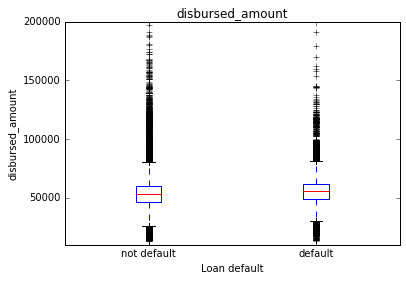

In [30]:
p0 = spark.sql('SELECT CAST(disbursed_amount AS int) AS disbursed_amount\
                    FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.disbursed_amount))
p0_disbursed_amount = p0_array.map(lambda (disbursed_amount) : disbursed_amount).collect()

p1 = spark.sql('SELECT CAST(disbursed_amount AS int) AS disbursed_amount\
                    FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.disbursed_amount))
p1_disbursed_amount = p1_array.map(lambda (disbursed_amount) : disbursed_amount).collect()

plt.title('disbursed_amount')
plt.boxplot([p0_disbursed_amount, p1_disbursed_amount])
plt.ylim(10000,200000)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('disbursed_amount')
plt.show()

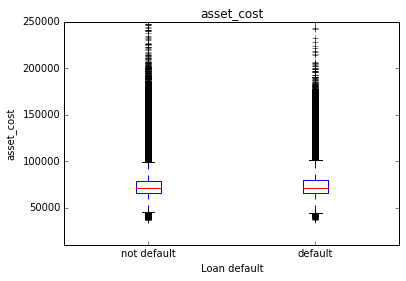

In [32]:
p0 = spark.sql('SELECT CAST(asset_cost AS int) AS asset_cost\
                    FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.asset_cost))
p0_asset_cost = p0_array.map(lambda (asset_cost) : asset_cost).collect()

p1 = spark.sql('SELECT CAST(asset_cost AS int) AS asset_cost\
                    FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.asset_cost))
p1_asset_cost = p1_array.map(lambda (asset_cost) : asset_cost).collect()

plt.title('asset_cost')
plt.boxplot([p0_asset_cost, p1_asset_cost])
plt.ylim(10000,250000)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('asset_cost')
plt.show()

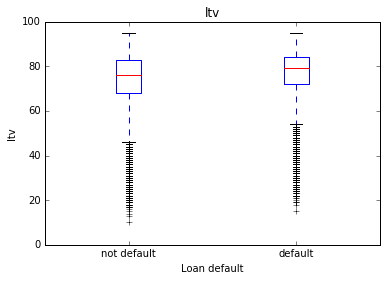

In [36]:
p0 = spark.sql('SELECT CAST(ltv AS int) AS ltv\
                    FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.ltv))
p0_ltv = p0_array.map(lambda (ltv) : ltv).collect()

p1 = spark.sql('SELECT CAST(ltv AS int) AS ltv\
                    FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.ltv))
p1_ltv = p1_array.map(lambda (ltv) : ltv).collect()

plt.title('ltv')
plt.boxplot([p0_ltv, p1_ltv])
plt.ylim(0,100)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('ltv')
plt.show()

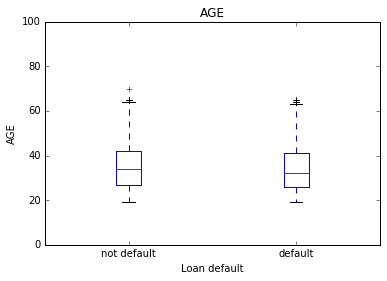

In [37]:
p0 = spark.sql('SELECT (2019 - CASE WHEN SUBSTRING(`Date.of.Birth`,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(`Date.of.Birth`,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(`Date.of.Birth`,7,2)) END) AS age FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.age))
p0_age = p0_array.map(lambda (age) : age).collect()

p1 = spark.sql('SELECT (2019 - CASE WHEN SUBSTRING(`Date.of.Birth`,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(`Date.of.Birth`,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(`Date.of.Birth`,7,2)) END) AS age FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.age))
p1_age = p1_array.map(lambda (age) : age).collect()

plt.title('AGE')
plt.boxplot([p0_age, p1_age])
plt.ylim(0,100)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('AGE')
plt.show()

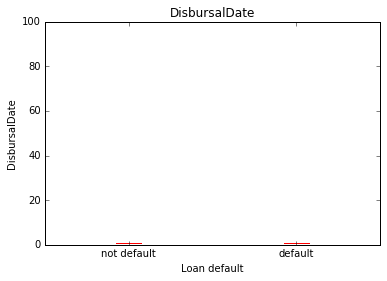

In [38]:
p0 = spark.sql('SELECT (2019 - CASE WHEN SUBSTRING(DisbursalDate,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(DisbursalDate,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(DisbursalDate,7,2)) END) AS DisbursalDate FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.DisbursalDate))
p0_DisbursalDate = p0_array.map(lambda (DisbursalDate) : DisbursalDate).collect()

p1 = spark.sql('SELECT (2019 - CASE WHEN SUBSTRING(DisbursalDate,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(DisbursalDate,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(DisbursalDate,7,2)) END) AS DisbursalDate FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.DisbursalDate))
p1_DisbursalDate = p1_array.map(lambda (DisbursalDate) : DisbursalDate).collect()

plt.title('DisbursalDate')
plt.boxplot([p0_DisbursalDate, p1_DisbursalDate])
plt.ylim(0,100)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('DisbursalDate')
plt.show()

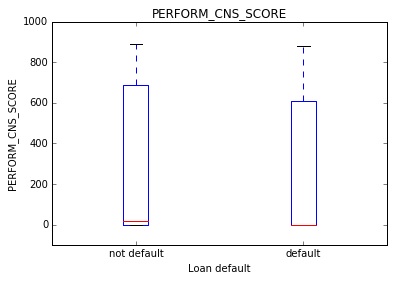

In [40]:
p0 = spark.sql('SELECT CAST(`PERFORM_CNS.SCORE` AS int) AS PERFORM_CNS_SCORE\
                    FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.PERFORM_CNS_SCORE))
p0_PERFORM_CNS_SCORE = p0_array.map(lambda (PERFORM_CNS_SCORE) : PERFORM_CNS_SCORE).collect()

p1 = spark.sql('SELECT CAST(`PERFORM_CNS.SCORE` AS int) AS PERFORM_CNS_SCORE\
                    FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.PERFORM_CNS_SCORE))
p1_PERFORM_CNS_SCORE = p1_array.map(lambda (PERFORM_CNS_SCORE) : PERFORM_CNS_SCORE).collect()

plt.title('PERFORM_CNS_SCORE')
plt.boxplot([p0_PERFORM_CNS_SCORE, p1_PERFORM_CNS_SCORE])
plt.ylim(-100,1000)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('PERFORM_CNS_SCORE')
plt.show()

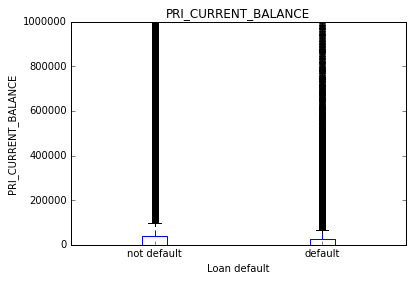

In [45]:
p0 = spark.sql('SELECT CAST(`PRI.CURRENT.BALANCE` AS int) AS PRI_CURRENT_BALANCE\
                    FROM df_train WHERE loan_default = 0')
p0_array = p0.rdd.map(lambda row : (row.PRI_CURRENT_BALANCE))
p0_PRI_CURRENT_BALANCE = p0_array.map(lambda (PRI_CURRENT_BALANCE) : PRI_CURRENT_BALANCE).collect()

p1 = spark.sql('SELECT CAST(`PRI.CURRENT.BALANCE` AS int) AS PRI_CURRENT_BALANCE\
                    FROM df_train WHERE loan_default = 1')
p1_array = p1.rdd.map(lambda row : (row.PRI_CURRENT_BALANCE))
p1_PRI_CURRENT_BALANCE = p1_array.map(lambda (PRI_CURRENT_BALANCE) : PRI_CURRENT_BALANCE).collect()

plt.title('PRI_CURRENT_BALANCE')
plt.boxplot([p0_PRI_CURRENT_BALANCE, p1_PRI_CURRENT_BALANCE])
plt.ylim(-100,1000000)
plt.xlabel('Loan default')
plt.xticks([1,2],['not default','default'])
plt.ylabel('PRI_CURRENT_BALANCE')
plt.show()

## 3. Data Preparing

In [87]:
train = spark.sql('SELECT UniqueID AS UniqueID,\
                      CAST(disbursed_amount AS int) AS disbursed_amount,\
                      CAST(asset_cost AS int) AS asset_cost,\
                      CAST(ltv AS DECIMAL(5,2)) AS ltv,\
                      branch_id AS branch_id,\
                      supplier_id AS supplier_id,\
                      manufacturer_id AS manufacturer_id,\
                      Current_pincode_ID AS Current_pincode_ID,\
                      (2019 - CASE WHEN SUBSTRING(`Date.of.Birth`,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(`Date.of.Birth`,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(`Date.of.Birth`,7,2)) END) AS age,\
                      CASE WHEN `Employment.type` = "Salaried" THEN 1 ELSE 2 END AS employment_type,\
                      (2019 - CASE WHEN SUBSTRING(DisbursalDate,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(DisbursalDate,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(DisbursalDate,7,2)) END) AS DisbursalDate,\
                      State_ID AS State_ID,\
                      Employee_code_ID AS Employee_code_ID,\
                      CAST(MobileNo_Avl_Flag AS int) AS MobileNo_Avl_Flag,\
                      CAST(Aadhar_flag AS int) AS Aadhar_flag,\
                      CAST(PAN_flag AS int) AS PAN_flag,\
                      CAST(VoterID_flag AS int) AS VoterID_flag,\
                      CAST(Driving_flag AS int) AS Driving_flag,\
                      CAST(Passport_flag AS int) AS Passport_flag,\
                      CAST(`PERFORM_CNS.SCORE` AS int) AS PERFORM_CNS_SCORE,\
                      `PERFORM_CNS.SCORE.DESCRIPTION` AS PERFORM_CNS_SCORE_DESCRIPTION,\
                      CAST(`PRI.NO.OF.ACCTS` AS int) AS PRI_NO_OF_ACCTS,\
                      CAST(`PRI.ACTIVE.ACCTS` AS int) AS PRI_ACTIVE_ACCTS,\
                      CAST(`PRI.OVERDUE.ACCTS` AS int) AS PRI_OVERDUE_ACCTS,\
                      CAST(`PRI.CURRENT.BALANCE` AS int) AS PRI_CURRENT_BALANCE,\
                      CAST(`PRI.SANCTIONED.AMOUNT` AS int) AS PRI_SANCTIONED_AMOUNT,\
                      CAST(`PRI.DISBURSED.AMOUNT` AS int) AS PRI_DISBURSED_AMOUNT,\
                      CAST(`SEC.NO.OF.ACCTS` AS int) AS SEC_NO_OF_ACCTS,\
                      CAST(`SEC.ACTIVE.ACCTS` AS int) AS SEC_ACTIVE_ACCTS,\
                      CAST(`SEC.OVERDUE.ACCTS` AS int) AS SEC_OVERDUE_ACCTS,\
                      CAST(`SEC.CURRENT.BALANCE` AS int) AS SEC_CURRENT_BALANCE,\
                      CAST(`SEC.SANCTIONED.AMOUNT` AS int) AS SEC_SANCTIONED_AMOUNT,\
                      CAST(`SEC.DISBURSED.AMOUNT` AS int) AS SEC_DISBURSED_AMOUNT,\
                      CAST(`PRIMARY.INSTAL.AMT` AS int) AS PRIMARY_INSTAL_AMT,\
                      CAST(`SEC.INSTAL.AMT` AS int) AS SEC_INSTAL_AMT,\
                      CAST(`NEW.ACCTS.IN.LAST.SIX.MONTHS` AS int) AS NEW_ACCTS_IN_LAST_SIX_MONTHS,\
                      CAST(`DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS` AS int) AS DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,\
                      `AVERAGE.ACCT.AGE` AS AVERAGE_ACCT_AGE,\
                      `CREDIT.HISTORY.LENGTH` AS CREDIT_HISTORY_LENGTH,\
                      CAST(`NO.OF_INQUIRIES` AS int) AS NO_OF_INQUIRIES,\
                      CAST(loan_default AS int) AS target\
                      FROM df_train')



In [88]:
# Split yrs and mon
split_col = pyspark.sql.functions.split(train['AVERAGE_ACCT_AGE'], ' ')
train = train.withColumn('AAA_years', split_col.getItem(0))
train = train.withColumn('AAA_mon', split_col.getItem(1))

split_col_1 = pyspark.sql.functions.split(train['CREDIT_HISTORY_LENGTH'], ' ')
train = train.withColumn('CHL_years', split_col_1.getItem(0))
train = train.withColumn('CHL_mon', split_col_1.getItem(1))



In [89]:
# Cut yrs and mom
from pyspark.sql.functions import *
train = train.withColumn('AAA_years',regexp_replace('AAA_years', 'yrs', ''))
train = train.withColumn('AAA_mon',regexp_replace('AAA_mon', 'mon', ''))
train = train.withColumn('CHL_years',regexp_replace('CHL_years', 'yrs', ''))
train = train.withColumn('CHL_mon',regexp_replace('CHL_mon', 'mon', ''))



In [90]:
# Change String to Integer
from pyspark.sql.types import IntegerType
train = train.withColumn('AAA_years', train["AAA_years"].cast(IntegerType()))
train = train.withColumn('AAA_mon', train["AAA_mon"].cast(IntegerType()))
train = train.withColumn('CHL_years', train["CHL_years"].cast(IntegerType()))
train = train.withColumn('CHL_mon', train["CHL_mon"].cast(IntegerType()))



In [91]:
# Calculate AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to month
train = train.withColumn('AVERAGE_ACCT_AGE_IN_MON', ((col('AAA_years')*12) + col('AAA_mon')))
train = train.withColumn('CREDIT_HISTORY_LENGTH_IN_MON', ((col('CHL_years')*12) + col('CHL_mon')))

train

DataFrame[UniqueID: string, disbursed_amount: int, asset_cost: int, ltv: decimal(5,2), branch_id: string, supplier_id: string, manufacturer_id: string, Current_pincode_ID: string, age: double, employment_type: int, DisbursalDate: double, State_ID: string, Employee_code_ID: string, MobileNo_Avl_Flag: int, Aadhar_flag: int, PAN_flag: int, VoterID_flag: int, Driving_flag: int, Passport_flag: int, PERFORM_CNS_SCORE: int, PERFORM_CNS_SCORE_DESCRIPTION: string, PRI_NO_OF_ACCTS: int, PRI_ACTIVE_ACCTS: int, PRI_OVERDUE_ACCTS: int, PRI_CURRENT_BALANCE: int, PRI_SANCTIONED_AMOUNT: int, PRI_DISBURSED_AMOUNT: int, SEC_NO_OF_ACCTS: int, SEC_ACTIVE_ACCTS: int, SEC_OVERDUE_ACCTS: int, SEC_CURRENT_BALANCE: int, SEC_SANCTIONED_AMOUNT: int, SEC_DISBURSED_AMOUNT: int, PRIMARY_INSTAL_AMT: int, SEC_INSTAL_AMT: int, NEW_ACCTS_IN_LAST_SIX_MONTHS: int, DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS: int, AVERAGE_ACCT_AGE: string, CREDIT_HISTORY_LENGTH: string, NO_OF_INQUIRIES: int, target: int, AAA_years: int, AAA_mon: 

### 3.1 Create New Feature

In [92]:
# Feature1. F! : New PERFORM_CNS.SCORE
# Find average score from score >300
p = spark.sql('SELECT CAST(`PERFORM_CNS.SCORE` AS int) AS SCORE FROM df_train\
                 WHERE `PERFORM_CNS.SCORE` > 299')
avg_score = p.select(avg('SCORE'))
avg_score.show()

# Replace PERFORM_CNS_SCORE < 300 with 650
train = train.withColumn('F1', when(col('PERFORM_CNS_SCORE') < 300, 650 ).otherwise(col('PERFORM_CNS_SCORE')))
train.show()



+-----------------+
|       avg(SCORE)|
+-----------------+
|650.9019822190405|
+-----------------+

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|Disbu

In [93]:
# Feature2. F2 : ltv/age
train = train.withColumn('F2', col('ltv')/col('age'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|DisbursalDate|State_ID|Employee_code_ID|MobileNo_Avl_Flag|Aadhar_flag|PAN_flag|VoterID_

In [94]:
# 3. Feature3 : disbursed_amount/age
train = train.withColumn('F3', col('disbursed_amount')/col('age'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|DisbursalDate|State_ID|Employee_code_ID|MobileNo_Avl_Flag|Aadhar_fla

In [95]:
# 4. Feature4 : disbursed_amount*New_score
train = train.withColumn('F4', col('disbursed_amount')*col('F1'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|DisbursalDate|State_ID|Employee_code_ID|MobileNo_Avl_Flag|A

In [96]:
# 5. Feature5 : ltv/New_score
train = train.withColumn('F5', col('ltv')/col('F1'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|DisbursalDate|State_ID|Employee_code_ID|Mob

In [97]:
# 6. Feature6 : PRI_CURRENT_BALANCE/disbursed_amount
train = train.withColumn('F6', col('PRI_CURRENT_BALANCE')/col('disbursed_amount'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+--------------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|DisbursalDate|State_ID

In [98]:
# 7. Feature7 : PRI_SANCTIONED_AMOUNT/disbursed_amount
train = train.withColumn('F7', col('PRI_SANCTIONED_AMOUNT')/col('disbursed_amount'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+--------------------+------------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|employment_type|Dis

In [99]:
# 8. Feature8 : PRI_DISBURSED_AMOUNT/disbursed_amount
train = train.withColumn('F8', col('PRI_DISBURSED_AMOUNT')/col('disbursed_amount'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+--------------------+------------------+------------------+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| age|

In [100]:
# 9. Feature9 : SEC_CURRENT_BALANCE/disbursed_amount
train = train.withColumn('F9', col('SEC_CURRENT_BALANCE')/col('disbursed_amount'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+--------------------+------------------+------------------+---+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_ID| 

In [101]:
# 10. Feature10 : SEC_SANCTIONED_AMOUNT/disbursed_amount
train = train.withColumn('F10', col('SEC_SANCTIONED_AMOUNT')/col('disbursed_amount'))
train.show()

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+--------------------+------------------+------------------+---+---+
|UniqueID|disbursed_amount|asset_cost|  ltv|branch_id|supplier_id|manufacturer_id|Current_pincode_

In [107]:
# 11. Feature11 : log(PERFORM_CNS_SCORE)
train = train.withColumn('F11', expr('case when PERFORM_CNS_SCORE = 0 then 0 else log(PERFORM_CNS_SCORE) end'))

train.select(['PERFORM_CNS_SCORE','F11']).show()

+-------------------+------------------+
|PRI_CURRENT_BALANCE|               F11|
+-------------------+------------------+
|                  0|               0.0|
|              27600| 6.393590753950631|
|                  0|               0.0|
|                  0| 5.720311776607412|
|                  0|               0.0|
|                  0| 6.715383386334681|
|                  0|               0.0|
|              72879| 2.833213344056216|
|                -41| 6.576469569048224|
|                  0| 6.706862336602747|
|                  0| 5.703782474656201|
|                676| 6.666956792429207|
|                  0| 5.703782474656201|
|              79750|6.6039438246004725|
|              95597| 5.703782474656201|
|                  0| 2.833213344056216|
|              29069| 5.703782474656201|
|            1076657|6.5337888379333435|
|                  0| 6.371611847231857|
|                  0| 6.421622267806518|
+-------------------+------------------+
only showing top

In [109]:
# 12. Feature12 : log(PRI_CURRENT_BALANCE)
train = train.withColumn('F12', expr('case when PRI_CURRENT_BALANCE <= 0 then 0 else log(PRI_CURRENT_BALANCE) end'))

train.select(['PRI_CURRENT_BALANCE','F12']).show()

+-------------------+------------------+
|PRI_CURRENT_BALANCE|               F12|
+-------------------+------------------+
|                  0|               0.0|
|              27600|10.225571051705241|
|                  0|               0.0|
|                  0|               0.0|
|                  0|               0.0|
|                  0|               0.0|
|                  0|               0.0|
|              72879|11.196555810654193|
|                -41|               0.0|
|                  0|               0.0|
|                  0|               0.0|
|                676| 6.516193076042964|
|                  0|               0.0|
|              79750|11.286652020647091|
|              95597|11.467896717793968|
|                  0|               0.0|
|              29069|10.277427593236435|
|            1076657|13.889371428162251|
|                  0|               0.0|
|                  0|               0.0|
+-------------------+------------------+
only showing top

In [114]:
# 13. Feature13 : log(PRI_SANCTIONED_AMOUNT)
train = train.withColumn('F13', expr('case when PRI_SANCTIONED_AMOUNT <= 0 then 0 else log(PRI_SANCTIONED_AMOUNT) end'))

train.select(['PRI_SANCTIONED_AMOUNT','F13']).show()

+---------------------+------------------+
|PRI_SANCTIONED_AMOUNT|               F13|
+---------------------+------------------+
|                    0|               0.0|
|                50200| 10.82377030567982|
|                    0|               0.0|
|                    0|               0.0|
|                    0|               0.0|
|                    0|               0.0|
|                    0|               0.0|
|                74500|11.218554404367652|
|               365384|12.808704134337342|
|                    0|               0.0|
|                    0|               0.0|
|                36154|  10.4955428715348|
|                69900|11.154820928221902|
|               187000|12.138863895836725|
|               179252|12.096547916000738|
|                    0|               0.0|
|              1067200|13.880548954143496|
|              2277048|14.638390425192595|
|                    0|               0.0|
|                    0|               0.0|
+----------

In [117]:
# 14. Feature14 : log(PRI_DISBURSED_AMOUNT)
train = train.withColumn('F14', expr('case when PRI_DISBURSED_AMOUNT <= 0 then 0 else log(PRI_DISBURSED_AMOUNT) end'))

train.select(['PRI_DISBURSED_AMOUNT','F14']).show()

+--------------------+------------------+
|PRI_DISBURSED_AMOUNT|               F14|
+--------------------+------------------+
|                   0|               0.0|
|               50200| 10.82377030567982|
|                   0|               0.0|
|                   0|               0.0|
|                   0|               0.0|
|                   0|               0.0|
|                   0|               0.0|
|               74500|11.218554404367652|
|              365384|12.808704134337342|
|                   0|               0.0|
|                   0|               0.0|
|               23374|10.059379572493102|
|               69900|11.154820928221902|
|              187000|12.138863895836725|
|              179252|12.096547916000738|
|                   0|               0.0|
|             1067200|13.880548954143496|
|             2277048|14.638390425192595|
|                   0|               0.0|
|                   0|               0.0|
+--------------------+------------

In [123]:
# 15. Feature15 : log(SEC_CURRENT_BALANCE)
train = train.withColumn('F15', expr('case when SEC_CURRENT_BALANCE <= 0 then 0 else log(SEC_CURRENT_BALANCE) end'))

train.select(['SEC_CURRENT_BALANCE','F15']).show()

+-------------------+---+
|SEC_CURRENT_BALANCE|F15|
+-------------------+---+
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
|                  0|0.0|
+-------------------+---+
only showing top 20 rows



In [129]:
# 16. Feature16 : log(SEC_SANCTIONED_AMOUNT)
train = train.withColumn('F16', expr('case when SEC_SANCTIONED_AMOUNT <= 0 then 0 else log(SEC_SANCTIONED_AMOUNT) end'))

train.select(['SEC_SANCTIONED_AMOUNT','F16']).show(100)

+---------------------+---+
|SEC_SANCTIONED_AMOUNT|F16|
+---------------------+---+
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                    0|0.0|
|                   

In [132]:
# 17. Feature17 : log(SEC_DISBURSED_AMOUNT)
train = train.withColumn('F17', expr('case when SEC_DISBURSED_AMOUNT <= 0 then 0 else log(SEC_DISBURSED_AMOUNT) end'))

train.select(['SEC_DISBURSED_AMOUNT','F17']).show(100)

+--------------------+---+
|SEC_DISBURSED_AMOUNT|F17|
+--------------------+---+
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|                   0|0.0|
|

In [138]:
# 18. Feature18 : log(PRIMARY_INSTAL_AMT)
train = train.withColumn('F18', expr('case when PRIMARY_INSTAL_AMT <= 0 then 0 else log(PRIMARY_INSTAL_AMT) end'))

train.select(['PRIMARY_INSTAL_AMT','F18']).show()

+------------------+------------------+
|PRIMARY_INSTAL_AMT|               F18|
+------------------+------------------+
|                 0|               0.0|
|              1991| 7.596392304064196|
|                 0|               0.0|
|                31|3.4339872044851463|
|                 0|               0.0|
|              1347| 7.205635176410364|
|                 0|               0.0|
|                 0|               0.0|
|                 0|               0.0|
|              2608| 7.866338923046544|
|              2270| 7.727535110475448|
|                 0|               0.0|
|              3300| 8.101677747454572|
|             23309| 10.05659483106667|
|              3514| 8.164510268747042|
|              7900| 8.974618038455112|
|             47100|10.760028280004509|
|              4982| 8.513586695822125|
|                 0|               0.0|
|                 0|               0.0|
+------------------+------------------+
only showing top 20 rows



In [141]:
# 19. Feature19 : log(SEC_INSTAL_AMT)
train = train.withColumn('F19', expr('case when SEC_INSTAL_AMT <= 0 then 0 else log(SEC_INSTAL_AMT) end'))

train.select(['SEC_INSTAL_AMT','F19']).show()

+--------------+---+
|SEC_INSTAL_AMT|F19|
+--------------+---+
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
|             0|0.0|
+--------------+---+
only showing top 20 rows



In [142]:
# split data frame to train1 and train2 before train
train1, train2 = train.randomSplit([0.90, 0.10], 10)
train1.select(count('age')).show()
train2.select(count('age')).show()

+----------+
|count(age)|
+----------+
|    209790|
+----------+

+----------+
|count(age)|
+----------+
|     23364|
+----------+



## 4. Model Training
Use pipeline and train with logistic regression model and normalized data before training. 

In [144]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

indexer = StringIndexer(inputCol='target', outputCol='label')
vectorAssembler = VectorAssembler(inputCols=['disbursed_amount', 'asset_cost','ltv','age','F6','F7','F8','F9','F10','F11',\
                                             'PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',\
                                             'F12','F13', 'F14', 'F15', 'F16','F17','F18', 'F19',\
                                             'AVERAGE_ACCT_AGE_IN_MON','CREDIT_HISTORY_LENGTH_IN_MON',\
                                             'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'],\
                                              outputCol='features')
normalizer = Normalizer(inputCol='features' , outputCol='features_norm', p=1.0)
lr = LogisticRegression(maxIter = 10)
pipeline = Pipeline(stages=[indexer, vectorAssembler, normalizer, lr])
model = pipeline.fit(train1)

# Prediction on train1
prediction = model.transform(train1)
eval = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')
print ('Accuracy on train1 set = ', eval.evaluate(prediction))
print ('Total prediction value')
prediction.select(count('prediction')).show()
print ('Result : Prediction by group')
prediction.groupBy('prediction').count().show()

# Prediction on train2
prediction2 = model.transform(train2)
eval = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')
print ('Accuracy on train2 set = ', eval.evaluate(prediction2))
print ('Total prediction value')
prediction2.select(count('prediction')).show()
print ('Result : Prediction by group')
prediction2.groupBy('prediction').count().show()


('Accuracy on train1 set = ', 0.7823579829531927)
Total prediction value
+-----------------+
|count(prediction)|
+-----------------+
|           210010|
+-----------------+

Result : Prediction by group
+----------+------+
|prediction| count|
+----------+------+
|       0.0|209724|
|       1.0|   286|
+----------+------+

('Accuracy on train2 set = ', 0.7847822329761494)
Total prediction value
+-----------------+
|count(prediction)|
+-----------------+
|            23305|
+-----------------+

Result : Prediction by group
+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|23275|
|       1.0|   30|
+----------+-----+



## 4. Prediction

#### 4.1 Tranfrom test data

In [61]:
test = spark.sql('SELECT UniqueID AS UniqueID,\
                      CAST(disbursed_amount AS int) AS disbursed_amount,\
                      CAST(asset_cost AS int) AS asset_cost,\
                      CAST(ltv AS DECIMAL(5,2)) AS ltv,\
                      branch_id AS branch_id,\
                      supplier_id AS supplier_id,\
                      manufacturer_id AS manufacturer_id,\
                      Current_pincode_ID AS Current_pincode_ID,\
                      (2019 - CASE WHEN SUBSTRING(`Date.of.Birth`,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(`Date.of.Birth`,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(`Date.of.Birth`,7,2)) END) AS age,\
                      CASE WHEN `Employment.type` = "Salaried" THEN 1 ELSE 2 END AS employment_type,\
                      (2019 - CASE WHEN SUBSTRING(DisbursalDate,7,2) < "20" \
                         THEN CONCAT("20",SUBSTRING(DisbursalDate,7,2)) ELSE\
                         CONCAT("19",SUBSTRING(DisbursalDate,7,2)) END) AS DisbursalDate,\
                      State_ID AS State_ID,\
                      Employee_code_ID AS Employee_code_ID,\
                      CAST(MobileNo_Avl_Flag AS int) AS MobileNo_Avl_Flag,\
                      CAST(Aadhar_flag AS int) AS Aadhar_flag,\
                      CAST(PAN_flag AS int) AS PAN_flag,\
                      CAST(VoterID_flag AS int) AS VoterID_flag,\
                      CAST(Driving_flag AS int) AS Driving_flag,\
                      CAST(Passport_flag AS int) AS Passport_flag,\
                      CAST(`PERFORM_CNS.SCORE` AS int) AS PERFORM_CNS_SCORE,\
                      `PERFORM_CNS.SCORE.DESCRIPTION` AS PERFORM_CNS_SCORE_DESCRIPTION,\
                      CAST(`PRI.NO.OF.ACCTS` AS int) AS PRI_NO_OF_ACCTS,\
                      CAST(`PRI.ACTIVE.ACCTS` AS int) AS PRI_ACTIVE_ACCTS,\
                      CAST(`PRI.OVERDUE.ACCTS` AS int) AS PRI_OVERDUE_ACCTS,\
                      CAST(`PRI.CURRENT.BALANCE` AS int) AS PRI_CURRENT_BALANCE,\
                      CAST(`PRI.SANCTIONED.AMOUNT` AS int) AS PRI_SANCTIONED_AMOUNT,\
                      CAST(`PRI.DISBURSED.AMOUNT` AS int) AS PRI_DISBURSED_AMOUNT,\
                      CAST(`SEC.NO.OF.ACCTS` AS int) AS SEC_NO_OF_ACCTS,\
                      CAST(`SEC.ACTIVE.ACCTS` AS int) AS SEC_ACTIVE_ACCTS,\
                      CAST(`SEC.OVERDUE.ACCTS` AS int) AS SEC_OVERDUE_ACCTS,\
                      CAST(`SEC.CURRENT.BALANCE` AS int) AS SEC_CURRENT_BALANCE,\
                      CAST(`SEC.SANCTIONED.AMOUNT` AS int) AS SEC_SANCTIONED_AMOUNT,\
                      CAST(`SEC.DISBURSED.AMOUNT` AS int) AS SEC_DISBURSED_AMOUNT,\
                      CAST(`PRIMARY.INSTAL.AMT` AS int) AS PRIMARY_INSTAL_AMT,\
                      CAST(`SEC.INSTAL.AMT` AS int) AS SEC_INSTAL_AMT,\
                      CAST(`NEW.ACCTS.IN.LAST.SIX.MONTHS` AS int) AS NEW_ACCTS_IN_LAST_SIX_MONTHS,\
                      CAST(`DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS` AS int) AS DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,\
                      `AVERAGE.ACCT.AGE` AS AVERAGE_ACCT_AGE,\
                      `CREDIT.HISTORY.LENGTH` AS CREDIT_HISTORY_LENGTH,\
                      CAST(`NO.OF_INQUIRIES` AS int) AS NO_OF_INQUIRIES\
                      FROM df_test')

# Split yrs and mon
split_col = pyspark.sql.functions.split(test['AVERAGE_ACCT_AGE'], ' ')
test = test.withColumn('AAA_years', split_col.getItem(0))
test = test.withColumn('AAA_mon', split_col.getItem(1))

split_col_1 = pyspark.sql.functions.split(test['CREDIT_HISTORY_LENGTH'], ' ')
test = test.withColumn('CHL_years', split_col_1.getItem(0))
test = test.withColumn('CHL_mon', split_col_1.getItem(1))

# Cut yrs and mom
from pyspark.sql.functions import *
test = test.withColumn('AAA_years',regexp_replace('AAA_years', 'yrs', ''))
test = test.withColumn('AAA_mon',regexp_replace('AAA_mon', 'mon', ''))
test = test.withColumn('CHL_years',regexp_replace('CHL_years', 'yrs', ''))
test = test.withColumn('CHL_mon',regexp_replace('CHL_mon', 'mon', ''))

# Change String to Integer
from pyspark.sql.types import IntegerType
test = test.withColumn('AAA_years', test["AAA_years"].cast(IntegerType()))
test = test.withColumn('AAA_mon', test["AAA_mon"].cast(IntegerType()))
test = test.withColumn('CHL_years',test ["CHL_years"].cast(IntegerType()))
test = test.withColumn('CHL_mon', test["CHL_mon"].cast(IntegerType()))

# Calculate AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to month
test = test.withColumn('AVERAGE_ACCT_AGE_IN_MON', ((col('AAA_years')*12) + col('AAA_mon')))
test = test.withColumn('CREDIT_HISTORY_LENGTH_IN_MON', ((col('CHL_years')*12) + col('CHL_mon')))

# Feature1. F! : New PERFORM_CNS.SCORE
# Replace PERFORM_CNS_SCORE < 300 with 650
test = test.withColumn('F1', when(col('PERFORM_CNS_SCORE') < 300, 650 ).otherwise(col('PERFORM_CNS_SCORE')))

# Feature2. F2 : ltv/age
test = test.withColumn('F2', col('ltv')/col('age'))

# 3. Feature3 : disbursed_amount/age
test = test.withColumn('F3', col('disbursed_amount')/col('age'))

# 4. Feature4 : disbursed_amount*New_score
test = test.withColumn('F4', col('disbursed_amount')*col('F1'))

# 5. Feature5 : ltv/New_score
test = test.withColumn('F5', col('ltv')/col('F1'))

# 6. Feature6 : PRI_CURRENT_BALANCE/disbursed_amount
test = test.withColumn('F6', col('PRI_CURRENT_BALANCE')/col('disbursed_amount'))

# 7. Feature7 : PRI_SANCTIONED_AMOUNT/disbursed_amount
test = test.withColumn('F7', col('PRI_SANCTIONED_AMOUNT')/col('disbursed_amount'))

# 8. Feature8 : PRI_DISBURSED_AMOUNT/disbursed_amount
test = test.withColumn('F8', col('PRI_DISBURSED_AMOUNT')/col('disbursed_amount'))

# 9. Feature9 : SEC_CURRENT_BALANCE/disbursed_amount
test = test.withColumn('F9', col('SEC_CURRENT_BALANCE')/col('disbursed_amount'))

# 10. Feature10 : SEC_SANCTIONED_AMOUNT/disbursed_amount
test = test.withColumn('F10', col('SEC_SANCTIONED_AMOUNT')/col('disbursed_amount'))


### 4.2 Prediction

In [62]:
prediction = model.transform(test)
prediction.show(10)

+--------+----------------+----------+-----+---------+-----------+---------------+------------------+----+---------------+-------------+--------+----------------+-----------------+-----------+--------+------------+------------+-------------+-----------------+-----------------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+---------------+----------------+-----------------+-------------------+---------------------+--------------------+------------------+--------------+----------------------------+-----------------------------------+----------------+---------------------+---------------+---------+-------+---------+-------+-----------------------+----------------------------+---+------------------+------------------+--------+---------------+------------------+------------------+------------------+---+---+--------------------+--------------------+--------------------+--------------------+----------+
|UniqueID|di

In [63]:
submission = prediction.select(['UniqueID','prediction'])
submission.show(100)
submission.groupBy('prediction').count().show()

+--------+----------+
|UniqueID|prediction|
+--------+----------+
|  655269|       0.0|
|  723482|       0.0|
|  758529|       0.0|
|  763449|       0.0|
|  708663|       0.0|
|  725530|       0.0|
|  708592|       0.0|
|  714975|       0.0|
|  712795|       0.0|
|  708656|       0.0|
|  712520|       0.0|
|  753695|       0.0|
|  708646|       0.0|
|  730225|       0.0|
|  714877|       0.0|
|  769166|       0.0|
|  710254|       0.0|
|  708812|       0.0|
|  726172|       0.0|
|  716959|       0.0|
|  725935|       0.0|
|  736039|       0.0|
|  748400|       0.0|
|  753652|       0.0|
|  695108|       0.0|
|  695320|       0.0|
|  662145|       0.0|
|  688068|       0.0|
|  662099|       0.0|
|  723985|       0.0|
|  757491|       0.0|
|  688610|       0.0|
|  733285|       0.0|
|  722392|       0.0|
|  689941|       0.0|
|  662086|       0.0|
|  662336|       0.0|
|  662373|       0.0|
|  662111|       0.0|
|  711459|       0.0|
|  662098|       0.0|
|  729627|       0.0|
|  729023|

### 4.3 Save output to data asset

In [1]:
# 1. Need to transform data frame 
import pandas as pd
df = submission.toPandas()

NameError: name 'submission' is not defined

In [65]:
# The code was removed by Watson Studio for sharing.

{'asset_id': u'610857c8-9307-43b3-b87d-9ba6404a153c',
 'bucket_name': u'analyticvidhya-donotdelete-pr-aln81syrlo2u0v',
 'file_name': 'submission.csv',
 'message': 'File submission.csv has been written successfully to the associated OS'}